<a href="https://colab.research.google.com/github/NiloyKumarKundu/Natural-Language-Processing/blob/main/Stock_price_prediction_and_forecasting.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('/content/drive/MyDrive/NLP/Datasets/AAPL.csv')

In [3]:
df.head()

,Unnamed: 0,symbol,date,close,high,low,open,volume,adjClose,adjHigh,adjLow,adjOpen,adjVolume,divCash,splitFactor
0,0,AAPL,2015-05-27 00:00:00+00:00,132.045,132.260,130.05,130.34,45833246,121.682558,121.880685,119.844118,120.111360,45833246,0.0,1.0
1,1,AAPL,2015-05-28 00:00:00+00:00,131.780,131.950,131.10,131.86,30733309,121.438354,121.595013,120.811718,121.512076,30733309,0.0,1.0
2,2,AAPL,2015-05-29 00:00:00+00:00,130.280,131.450,129.90,131.23,50884452,120.056069,121.134251,119.705890,120.931516,50884452,0.0,1.0
3,3,AAPL,2015-06-01 00:00:00+00:00,130.535,131.390,130.05,131.20,32112797,120.291057,121.078960,119.844118,120.903870,32112797,0.0,1.0
4,4,AAPL,2015-06-02 00:00:00+00:00,129.960,130.655,129.32,129.86,33667627,119.761181,120.401640,119.171406,119.669029,33667627,0.0,1.0


In [4]:
df1 = df.reset_index()['close']

In [5]:
df1

,close
0,132.045
1,131.780
2,130.280
3,130.535
4,129.960
...,...
1253,314.960
1254,313.140
1255,319.230
1256,316.850


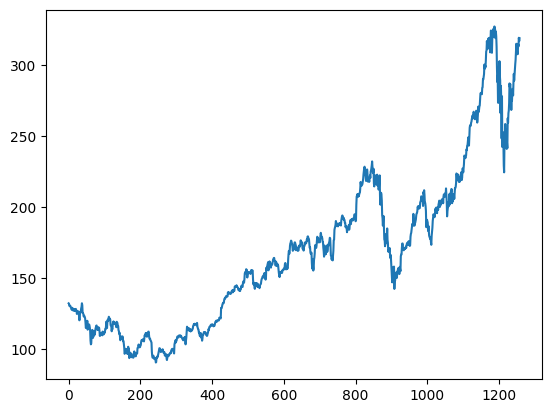

In [6]:
plt.plot(df1)

In [8]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0, 1))
df1 = scaler.fit_transform(np.array(df1).reshape(-1, 1))
print(df1)

[[0.17607447]
 [0.17495567]
 [0.16862282]
 ...
 [0.96635143]
 [0.9563033 ]
 [0.96491598]]


In [10]:
training_size = int(len(df1) * 0.65) # Convert training_size to an integer
test_size = len(df1) - training_size
train_data, test_data = df1[0:training_size, :], df1[training_size:len(df1), :]

In [11]:
training_size, test_size

(817, 441)

In [12]:
train_data

array([[0.17607447],
       [0.17495567],
       [0.16862282],
       [0.1696994 ],
       [0.16727181],
       [0.16794731],
       [0.16473866],
       [0.16174111],
       [0.1581525 ],
       [0.15654817],
       [0.16271215],
       [0.1614878 ],
       [0.1554927 ],
       [0.15443722],
       [0.15730811],
       [0.15604154],
       [0.15849025],
       [0.15308621],
       [0.15735033],
       [0.15490163],
       [0.15946129],
       [0.15688592],
       [0.1537195 ],
       [0.14434687],
       [0.14812547],
       [0.15308621],
       [0.15241071],
       [0.15055307],
       [0.14924428],
       [0.13607194],
       [0.12551718],
       [0.13906949],
       [0.14911762],
       [0.14890653],
       [0.15401503],
       [0.16115005],
       [0.16583636],
       [0.17618002],
       [0.17060711],
       [0.14725998],
       [0.14700667],
       [0.14422021],
       [0.13691632],
       [0.13949168],
       [0.13784514],
       [0.13522756],
       [0.13071012],
       [0.118

In [13]:
def create_dataset(dataset, time_step=1):
  dataX, dataY = [], []
  for i in range(len(dataset) - time_step - 1):
    a = dataset[i:(i + time_step), 0]
    dataX.append(a)
    dataY.append(dataset[i + time_step, 0])
  return np.array(dataX), np.array(dataY)

In [14]:
time_step = 100
X_train, y_train = create_dataset(train_data, time_step)
X_test, y_test = create_dataset(test_data, time_step)

In [15]:
X_train[0], y_train[0]

(array([0.17607447, 0.17495567, 0.16862282, 0.1696994 , 0.16727181,
        0.16794731, 0.16473866, 0.16174111, 0.1581525 , 0.15654817,
        0.16271215, 0.1614878 , 0.1554927 , 0.15443722, 0.15730811,
        0.15604154, 0.15849025, 0.15308621, 0.15735033, 0.15490163,
        0.15946129, 0.15688592, 0.1537195 , 0.14434687, 0.14812547,
        0.15308621, 0.15241071, 0.15055307, 0.14924428, 0.13607194,
        0.12551718, 0.13906949, 0.14911762, 0.14890653, 0.15401503,
        0.16115005, 0.16583636, 0.17618002, 0.17060711, 0.14725998,
        0.14700667, 0.14422021, 0.13691632, 0.13949168, 0.13784514,
        0.13522756, 0.13071012, 0.11863548, 0.10259225, 0.1058009 ,
        0.10466098, 0.10630752, 0.12403952, 0.09773706, 0.10512539,
        0.10474542, 0.10816516, 0.11323144, 0.11044499, 0.10415435,
        0.09419066, 0.06510175, 0.05395592, 0.0565735 , 0.08169383,
        0.09533058, 0.09689268, 0.09465507, 0.07337668, 0.09288187,
        0.08456472, 0.07992063, 0.09275521, 0.08

In [16]:
X_train[1], y_train[1]

(array([0.17495567, 0.16862282, 0.1696994 , 0.16727181, 0.16794731,
        0.16473866, 0.16174111, 0.1581525 , 0.15654817, 0.16271215,
        0.1614878 , 0.1554927 , 0.15443722, 0.15730811, 0.15604154,
        0.15849025, 0.15308621, 0.15735033, 0.15490163, 0.15946129,
        0.15688592, 0.1537195 , 0.14434687, 0.14812547, 0.15308621,
        0.15241071, 0.15055307, 0.14924428, 0.13607194, 0.12551718,
        0.13906949, 0.14911762, 0.14890653, 0.15401503, 0.16115005,
        0.16583636, 0.17618002, 0.17060711, 0.14725998, 0.14700667,
        0.14422021, 0.13691632, 0.13949168, 0.13784514, 0.13522756,
        0.13071012, 0.11863548, 0.10259225, 0.1058009 , 0.10466098,
        0.10630752, 0.12403952, 0.09773706, 0.10512539, 0.10474542,
        0.10816516, 0.11323144, 0.11044499, 0.10415435, 0.09419066,
        0.06510175, 0.05395592, 0.0565735 , 0.08169383, 0.09533058,
        0.09689268, 0.09465507, 0.07337668, 0.09288187, 0.08456472,
        0.07992063, 0.09275521, 0.0836359 , 0.09

In [18]:
print(X_train.shape), print(y_train.shape)

(716, 100)
(716,)


(None, None)

In [19]:
X_train = X_train.reshape(X_train.shape[0], X_train.shape[1], 1)
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1], 1)

In [20]:
X_train.shape

(716, 100, 1)

In [21]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM

In [22]:
model = Sequential()
model.add(LSTM(50, return_sequences=True, input_shape=(100, 1)))
model.add(LSTM(50, return_sequences=True))
model.add(LSTM(50))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')
model.summary()

/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                          │ (None, 100, 50)             │          10,400 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_1 (LSTM)                        │ (None, 100, 50)             │          20,200 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_2 (LSTM)                        │ (None, 50)                  │          20,200 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 1)                   │              51 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 50,851 (198.64 KB)

 Trainable params: 50,851 (198.64 KB)

 Non-trainable params: 0 (0.00 B)

In [23]:
model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=100, batch_size=64, verbose=1)

Epoch 1/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 11s 229ms/step - loss: 0.0336 - val_loss: 0.0506
Epoch 2/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 6s 301ms/step - loss: 0.0044 - val_loss: 0.0045
Epoch 3/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 4s 200ms/step - loss: 0.0020 - val_loss: 0.0046
Epoch 4/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 3s 240ms/step - loss: 9.3792e-04 - val_loss: 0.0043
Epoch 5/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 5s 244ms/step - loss: 7.4235e-04 - val_loss: 0.0046
Epoch 6/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 6s 288ms/step - loss: 5.8096e-04 - val_loss: 0.0039
Epoch 7/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 3s 237ms/step - loss: 6.0074e-04 - val_loss: 0.0037
Epoch 8/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 4s 167ms/step - loss: 6.3009e-04 - val_loss: 0.0037
Epoch 9/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 4s 325ms/step - loss: 5.8877e-04 - val_loss: 0.0036
Epoch 10/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 7s 417ms/step - loss: 5.8040e-04 - val_loss: 0.0035
Epoch 11/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 8s 219ms/step - loss: 5.7477e-04 - val_loss: 0.0034
Epoch 12

In [24]:
train_predict = model.predict(X_train)
test_predict = model.predict(X_test)

23/23 ━━━━━━━━━━━━━━━━━━━━ 3s 57ms/step
11/11 ━━━━━━━━━━━━━━━━━━━━ 1s 58ms/step


In [25]:
train_predict = scaler.inverse_transform(train_predict)
test_predict = scaler.inverse_transform(test_predict)

In [26]:
import math
from sklearn.metrics import mean_squared_error
math.sqrt(mean_squared_error(y_train, train_predict))

141.88543720135854

In [27]:
math.sqrt(mean_squared_error(y_test, test_predict))

238.99749561413995

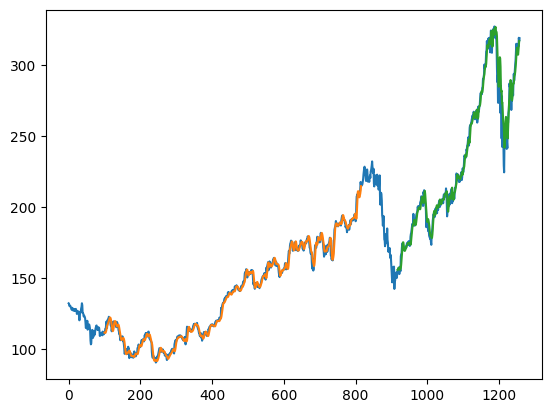

In [29]:
look_back=100
trainPredictPlot = np.empty_like(df1)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(train_predict)+look_back, :] = train_predict
testPredictPlot = np.empty_like(df1)
testPredictPlot[:, :] = np.nan
testPredictPlot[len(train_predict)+(look_back*2)+1:len(df1)-1, :] = test_predict
plt.plot(scaler.inverse_transform(df1))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()


In [30]:
len(test_data)

441

In [32]:
x_input = test_data[341:].reshape(1, -1)
x_input.shape

(1, 100)

In [33]:
temp_input = list(x_input)
temp_input = temp_input[0].tolist()

In [34]:
temp_input

[0.8583551465000423,
 0.8866418981676942,
 0.8743139407244789,
 0.8843198513890065,
 0.8783669678290975,
 0.8986321033521913,
 0.925821160179009,
 0.9287764924427933,
 0.9567677108840666,
 0.9386979650426415,
 0.933040614709111,
 0.9495060373216249,
 0.9642404796082076,
 0.9551211686228154,
 0.9598919192772104,
 0.9663514312251966,
 0.9624672802499368,
 0.9229502659799038,
 0.9598497002448705,
 0.9879253567508233,
 0.985941062230854,
 0.9253145317909315,
 0.9217259140420504,
 0.964747107996285,
 0.9757240564046274,
 0.9915984125643842,
 0.9697289538123788,
 0.9761462467280253,
 0.9679557544541082,
 1.0000000000000002,
 0.9901629654648318,
 0.9905007177235499,
 0.9653803934813816,
 0.9848855864223593,
 0.9708688676855528,
 0.9402600692392133,
 0.8774803681499621,
 0.8348391454867856,
 0.8541332432660644,
 0.7733682344000676,
 0.7726927298826314,
 0.8801401671873683,
 0.8400743054969182,
 0.8967322468969012,
 0.8552731571392387,
 0.8388499535590646,
 0.7423372456303303,
 0.82327113062568

### 30 day forecast

In [35]:
from numpy import array

lst_output = []
n_steps = 100
i = 0
while (i < 30):
  if (len(temp_input) > 100):
    x_input = np.array(temp_input[1:])
    print("{} day input {}".format(i, x_input))
    x_input = x_input.reshape(1, -1)
    x_input = x_input.reshape((1, n_steps, 1))
    yhat = model.predict(x_input, verbose=0)
    print("{} day output {}".format(i, yhat))
    temp_input.extend(yhat[0].tolist())
    temp_input = temp_input[1:]
    lst_output.extend(yhat.tolist())
    i = i + 1
  else:
    x_input = x_input.reshape((1, n_steps, 1))
    yhat = model.predict(x_input, verbose=0)
    print(yhat[0])
    temp_input.extend(yhat[0].tolist())
    print(len(temp_input))
    lst_output.extend(yhat.tolist())
    i = i + 1
print(lst_output)

[0.96313375]
101
1 day input [0.8866419  0.87431394 0.88431985 0.87836697 0.8986321  0.92582116
 0.92877649 0.95676771 0.93869797 0.93304061 0.94950604 0.96424048
 0.95512117 0.95989192 0.96635143 0.96246728 0.92295027 0.9598497
 0.98792536 0.98594106 0.92531453 0.92172591 0.96474711 0.97572406
 0.99159841 0.96972895 0.97614625 0.96795575 1.         0.99016297
 0.99050072 0.96538039 0.98488559 0.97086887 0.94026007 0.87748037
 0.83483915 0.85413324 0.77336823 0.77269273 0.88014017 0.84007431
 0.89673225 0.85527316 0.83884995 0.74233725 0.82327113 0.78143207
 0.6665963  0.7921557  0.64118044 0.68614371 0.66001013 0.65203074
 0.58642236 0.56586169 0.66089673 0.65515494 0.70970193 0.66452757
 0.69437642 0.69218104 0.63569197 0.65266402 0.63780292 0.7267162
 0.71388162 0.74191506 0.75002111 0.77222832 0.83049059 0.8194292
 0.8289707  0.8125475  0.78776492 0.75162543 0.78426074 0.77974331
 0.81326522 0.8141096  0.79473106 0.83336148 0.85898843 0.83901883
 0.85628641 0.87486279 0.88782403 0.

In [37]:
day_new = np.arange(1, 101)
day_pred = np.arange(101, 131)

In [38]:
len(df1)

1258

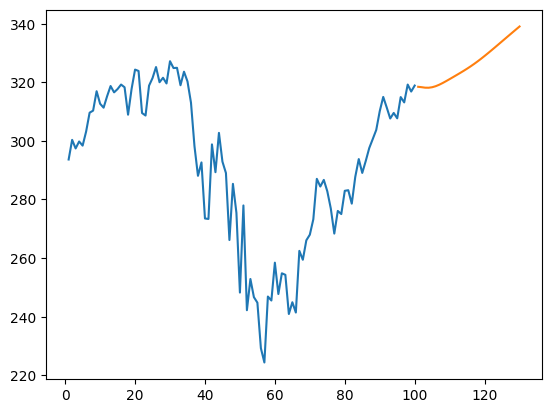

In [39]:
plt.plot(day_new, scaler.inverse_transform(df1[1158:]))
plt.plot(day_pred, scaler.inverse_transform(lst_output))

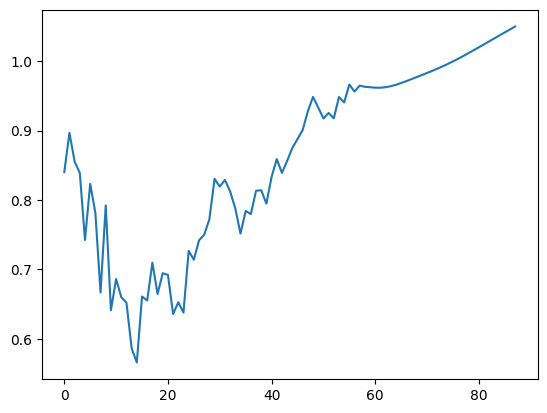

In [40]:
df3 = df1.tolist()
df3.extend(lst_output)
plt.plot(df3[1200:])

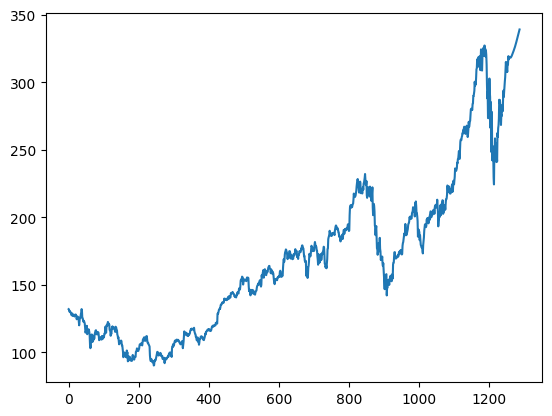

In [41]:
df3 = scaler.inverse_transform(df3).tolist()
plt.plot(df3)